In [33]:
import numpy as np
import pandas as pd
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
import seaborn as sns
import re
import matplotlib.pyplot as plt

В своей итоговой работе по эконометрике я решила исследовать уровень заработных плат, зависящий от различных критериев, в том числе от пола работника. 
Описание моего датасета также прикреплено на этом репозитории.


## 1.  OLS модель, спецификация 

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/vysotinavaleria/Homework-econometrics/main/wage_predict.csv')
df

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,advising,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary
0,Q,2,19,1,13,4,2,1,1,3,...,5,4,5,4,4,5,1,1,2,23833.333333
1,C,9,14,1,11,7,4,2,1,1,...,5,3,5,3,4,5,1,1,1,6583.333333
2,L,3,16,2,12,4,2,1,1,3,...,3,1,4,2,1,5,1,1,2,433.333333
3,Q,5,12,2,7,4,5,4,2,1,...,5,2,5,2,5,5,2,1,0,379.000000
4,P,1,18,1,13,4,3,4,3,3,...,4,2,5,4,1,5,1,2,2,4583.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,N,3,12,2,7,8,4,5,1,1,...,5,5,5,3,1,5,1,5,2,4583.333333
2001,C,3,16,1,12,4,3,3,1,3,...,4,4,4,2,3,4,1,1,2,5858.333333
2002,Q,1,18,2,13,4,4,1,2,2,...,4,4,4,3,2,5,1,2,2,11000.000000
2003,M,4,12,2,7,4,5,1,2,1,...,5,2,5,4,1,5,1,1,2,693.333333


#### Спецификация
$$
Salary = \beta_0 + \beta_1*sex+\beta_2*computer-level+\beta_3*labour
$$

In [3]:
salary = smf.ols(formula='monthly_salary ~ sex+computer_level+labour', data=df).fit()
salary.params.round(3)

Intercept         6110.296
sex              -1532.987
computer_level    1309.594
labour            -354.043
dtype: float64

# 2. Построение графиков, интерпретация коэффициентов

### Интерпретация
-Зарплаты женщин меньше зарплат мужчин на 1532 долл. при прочих равных условиях.

-При увелничении значения переменной computer_level на 1, зарплата увеличивается на 1309 долл.при прочих равных условиях.

-Чем чаще человек занимается физическим трудом на работе, тем ниже его зарплата при прочих равных условиях.

### Графики

<AxesSubplot: xlabel='yrs_qual', ylabel='monthly_salary'>

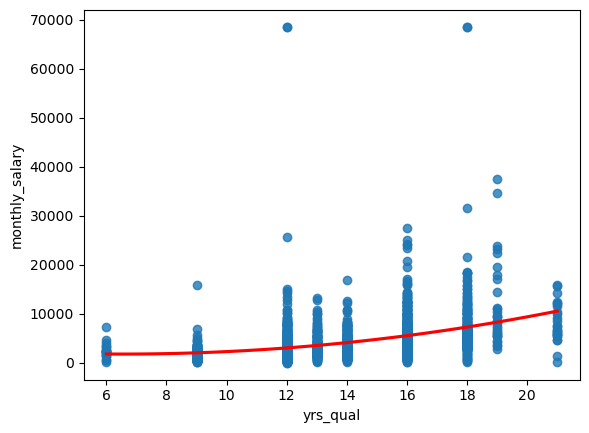

In [4]:
sns.regplot(data=df, y='monthly_salary', x='yrs_qual', ci=None, order = 2, line_kws={"color": "r"})

### Интерпретация графика
Между зарплатой и квалификацией наблюдается нелинейная прямая зависимость, чем выше квалификация, тем выше зарплата. Посмотрим, что будет, если изменить порядок переменной "квалификация": изменится ли зависимость?

# 3. Изменение порядка переменной, график

In [5]:
df['yrs_qual^3']  = df['yrs_qual']*df['yrs_qual']*df['yrs_qual']

<AxesSubplot: xlabel='yrs_qual^3', ylabel='monthly_salary'>

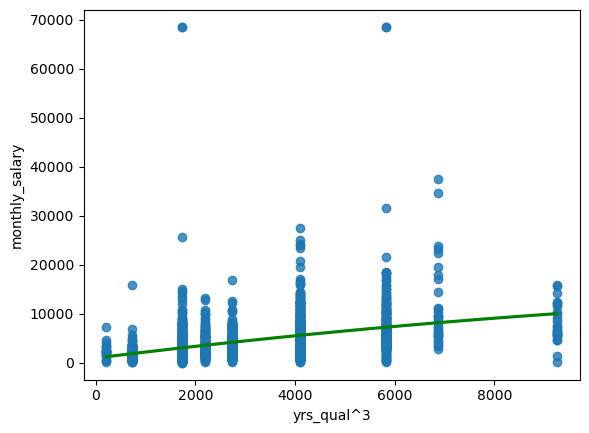

In [6]:
sns.regplot(data=df, y='monthly_salary', x='yrs_qual^3', ci=None, order = 2, line_kws={"color": "g"})

### Вывод
Кривая стала более резко уходить вверх, увеличился коэффициент наклона, так как значения переменной "квалификация" увеличились. уменьшилась предсказательная точность графика, кривая стала выгнутой, а не вогнутой.

# 4. Графический анализ структурных сдвигов, тест Чоу

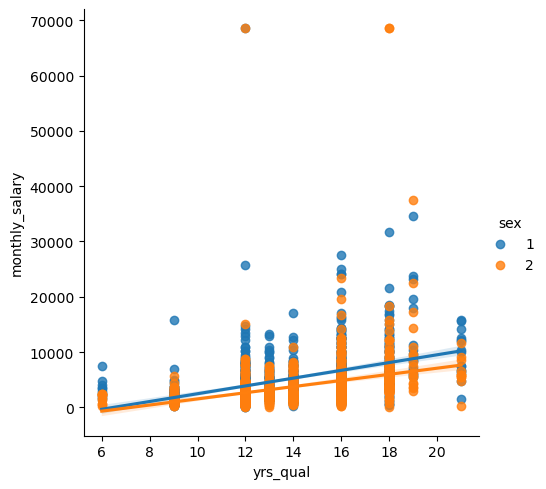

In [7]:
sns.lmplot(x='yrs_qual', y='monthly_salary', hue='sex', data=df)

### Интерпретация:
При одинаковой квалификации мужчины зарабатывают больше, чем женщины.

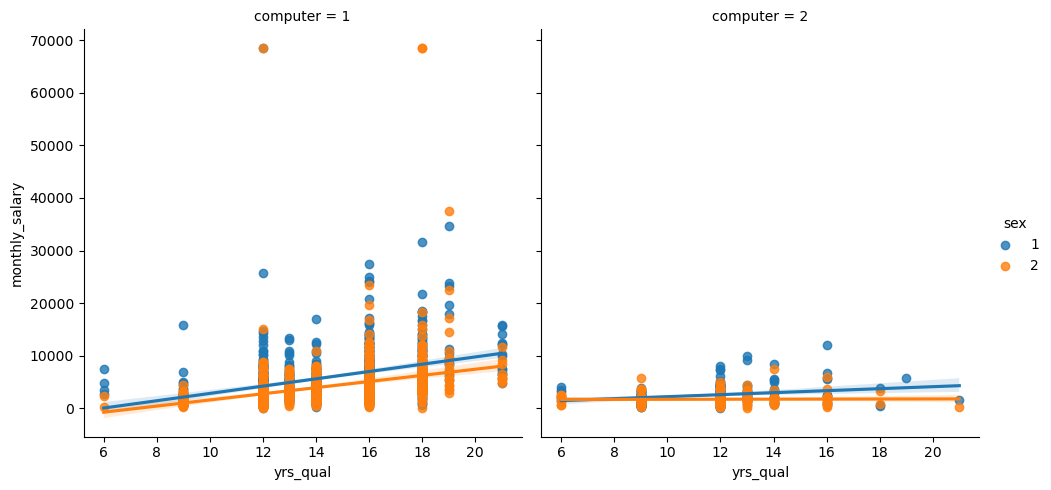

In [8]:
sns.lmplot(x="yrs_qual", y="monthly_salary", hue="sex",col='computer', data=df)

### Интерпретация:
При одинаковой квалификации женщины зарабатывают меньше мужчин, при отсутствии компьютера и мжчины, и женщзины зарабатывают меньше, чем они могли бы при его наличии.

# 5.  Значимость коэффициентов. Вычисление TSS, RSS, ESS, стандартной ошибки, R^2 и R^2adj.

In [9]:
TSS = salary.centered_tss.round(3)
TSS

43883272748.438

In [10]:
ESS = salary.ess.round(3)
ESS

5608787109.278

In [11]:
RSS = salary.ssr.round(3)
RSS

38274485639.16

In [12]:
R2 = RSS/TSS
R2

0.8721884955702708

In [13]:
s2 = RSS/(5000 - 4)
s2

7661025.948590874

In [14]:
R2adj = 1 - (1 - R2)*(5000-1)/(5000 - 4)
R2adj

0.8721117472689719

### Вывод:
Значение коэффициента R2adj близко к 1, следовательно, предсказательная точность построенной модели очень высока.

In [15]:
model = smf.ols(formula='monthly_salary ~ sex+computer_level+labour', data=df).fit()
model.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6110.2962,465.753,13.119,0.000,5196.885,7023.708
sex,-1532.9869,195.886,-7.826,0.000,-1917.148,-1148.826
computer_level,1309.5935,126.456,10.356,0.000,1061.593,1557.594
labour,-354.0428,63.158,-5.606,0.000,-477.906,-230.180


In [16]:
df_1 = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0] 
df_1

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6110.2962,465.753,13.119,0.0,5196.885,7023.708
sex,-1532.9869,195.886,-7.826,0.0,-1917.148,-1148.826
computer_level,1309.5935,126.456,10.356,0.0,1061.593,1557.594
labour,-354.0428,63.158,-5.606,0.0,-477.906,-230.180


In [17]:
df_1['tvalues']  = df_1['coef']/df_1['std err']
df_1

,coef,std err,t,P>|t|,[0.025,0.975],tvalues
Intercept,6110.2962,465.753,13.119,0.0,5196.885,7023.708,13.119177
sex,-1532.9869,195.886,-7.826,0.0,-1917.148,-1148.826,-7.825914
computer_level,1309.5935,126.456,10.356,0.0,1061.593,1557.594,10.356120
labour,-354.0428,63.158,-5.606,0.0,-477.906,-230.180,-5.605668


In [18]:
alpha = 0.05 
print('Уровень значимости alpha: ', alpha)
DF = int(model.df_resid) 
t_crit = scipy.stats.t.ppf(1-alpha/2, DF)
print('Критическое значение t_crit: ', t_crit.round(3))

Уровень значимости alpha:  0.05
Критическое значение t_crit:  1.961


In [19]:
df_1['znachimosty'] = df_1.apply(lambda x : 'znachim' if np.abs(x['tvalues']) > t_crit else 'ne znachim', axis = 1 )
df_1

,coef,std err,t,P>|t|,[0.025,0.975],tvalues,znachimosty
Intercept,6110.2962,465.753,13.119,0.0,5196.885,7023.708,13.119177,znachim
sex,-1532.9869,195.886,-7.826,0.0,-1917.148,-1148.826,-7.825914,znachim
computer_level,1309.5935,126.456,10.356,0.0,1061.593,1557.594,10.356120,znachim
labour,-354.0428,63.158,-5.606,0.0,-477.906,-230.180,-5.605668,znachim


### Вывод:
На основании T-теста, использующего статистику Стьюдента, мож7но сделать вывод, что все регрессоры в модели значимы

# 5. Тест Фишера

### Гипотезы:
$$
H0: \beta_{sex}=\beta_{computer_level}=\beta_{monthly_salary}=\beta_{labour}=0
$$
$$
H1: \beta_{sex}^2+\beta_{computer_level}^2+\beta_{monthly_salary}^2+\beta_{labour}^2>0
$$

### Для того, чтобы провести тест Фишера, необходимо найти показатели R^2j для расширенной регрессии.
Уровень значимости = 5%

In [20]:
salary_unrest = smf.ols(formula='monthly_salary ~ sex+computer_level+labour+occupation+highest_qual+area_of_study+influencing+negotiating+sector', data=df).fit()
salary_unrest.params.round(3)

Intercept         4711.334
sex              -1740.409
computer_level     475.630
labour            -211.921
occupation        -255.565
highest_qual       274.261
area_of_study       70.490
influencing        123.564
negotiating        108.416
sector             -89.598
dtype: float64

In [21]:
RSS_2 = salary_unrest.ssr.round(3)
TSS_2 = salary_unrest.centered_tss.round(3)
R_2 = RSS_2/TSS_2
R_2

0.8069443566956717

In [22]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.806          0.872'))
print (unrest, rest)

0.806 0.872


In [23]:
F_nab = (unrest - rest)/(1-unrest)*(5000 - 13)/4
F_nab

-424.15206185566984

In [24]:
F_cr = stats.f.ppf(1-0.05, 4, 5000-13)
F_cr

2.373713672224553

### Вывод: 
$$
F_{obs}<F{cr}
$$
Данные согласуются с гипотезорй Н0, статистика имеет вид распределения Фишера

# 6. Построение доверительных интервалов

In [25]:
df_tab = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
df_tab

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6110.2962,465.753,13.119,0.0,5196.885,7023.708
sex,-1532.9869,195.886,-7.826,0.0,-1917.148,-1148.826
computer_level,1309.5935,126.456,10.356,0.0,1061.593,1557.594
labour,-354.0428,63.158,-5.606,0.0,-477.906,-230.180


In [26]:
# уровень значимости 5%
nobs = model.nobs
regr_cnt = model.df_model + 1
print(f'Количество наблюдений = {nobs:.0f}')
print(f'Количество регрессоров + 1 = {regr_cnt:.0f}')
t_cr = stats.t.ppf(1-alpha/2, nobs - regr_cnt)
print(f'Уровень значимости alpha = {alpha:.2f}')
print(f'Критическое значение t_cr = {t_cr:.3f}')

Количество наблюдений = 2005
Количество регрессоров + 1 = 4
Уровень значимости alpha = 0.05
Критическое значение t_cr = 1.961


In [27]:
df_tab['нижний'] = (df_tab['coef'].astype(float) - df_tab['std err'].astype(float)*t_cr).round(2)
df_tab['верхний'] = (df_tab['coef'].astype(float) + df_tab['std err'].astype(float)*t_cr).round(2)
df_tab

,coef,std err,t,P>|t|,[0.025,0.975],нижний,верхний
Intercept,6110.2962,465.753,13.119,0.0,5196.885,7023.708,5196.88,7023.71
sex,-1532.9869,195.886,-7.826,0.0,-1917.148,-1148.826,-1917.15,-1148.83
computer_level,1309.5935,126.456,10.356,0.0,1061.593,1557.594,1061.59,1557.59
labour,-354.0428,63.158,-5.606,0.0,-477.906,-230.180,-477.91,-230.18


# 7. Прогнозирование

Для исследования возьмем первые 3 строки датасета

In [30]:
df1 = df.head(3)
df1

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,instructing,problem_solving_quick,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary,yrs_qual^3
0,Q,2,19,1,13,4,2,1,1,3,...,4,5,4,4,5,1,1,2,23833.333333,6859
1,C,9,14,1,11,7,4,2,1,1,...,3,5,3,4,5,1,1,1,6583.333333,2744
2,L,3,16,2,12,4,2,1,1,3,...,1,4,2,1,5,1,1,2,433.333333,4096


In [31]:
res = model.predict(exog=df1, transform=True)

In [32]:
df_res = pd.DataFrame(res.round(2), columns=['Прогноз'])
df_res.reset_index(drop=True , inplace=True)
df_res.index += 1
df_res

,Прогноз
1,5780.33
2,4470.73
3,5309.47


# 8. Мультиколлинеарность

In [34]:
model_0 = smf.ols(data = df , formula = 'monthly_salary ~ sex+computer_level+labour').fit()
model_1 = smf.ols(data = df , formula = 'sex ~ monthly_salary+computer_level+labour').fit()
model_2 = smf.ols(data = df , formula = 'labour ~ monthly_salary+computer_level+sex').fit()
model_3 = smf.ols(data = df , formula = 'computer_level ~ monthly_salary+sex+labour').fit()
model_1.params.round(3)

Intercept         1.676
monthly_salary   -0.000
computer_level    0.013
labour           -0.026
dtype: float64

In [35]:
model_2.params.round(3)

Intercept         5.085
monthly_salary   -0.000
computer_level   -0.827
sex              -0.255
dtype: float64

In [36]:
model_3.params.round(3)

Intercept         1.832
monthly_salary    0.000
sex               0.030
labour           -0.199
dtype: float64

In [37]:
model_0.params

Intercept         6110.296189
sex              -1532.986910
computer_level    1309.593528
labour            -354.042791
dtype: float64

In [38]:
model.rsquared

0.12781150442972433

In [39]:
VIF_1 = 1/(1 - model_1.rsquared.round(3))
VIF_1.round(3)

1.034

In [40]:
VIF_2 = 1/(1 - model_2.rsquared.round(3))
VIF_2.round(3)

1.276

In [41]:
VIF_3 = 1/(1 - model_3.rsquared.round(3))
VIF_3.round(3)

1.319

### Рассмотрим первую модель в деталях

In [42]:
X = df[['monthly_salary' , 'computer_level',  'sex', 'labour']]
X

,monthly_salary,computer_level,sex,labour
0,23833.333333,2,1,4
1,6583.333333,1,1,4
2,433.333333,2,2,1
3,379.000000,0,2,5
4,4583.333333,2,1,1
...,...,...,...,...
2000,4583.333333,2,2,1
2001,5858.333333,2,1,3
2002,11000.000000,2,2,2
2003,693.333333,2,2,1


In [43]:
np.linalg.inv(X.T@X).round(2)

array([[ 0., -0., -0., -0.],
       [-0.,  0., -0.,  0.],
       [-0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.]])

In [44]:
np.linalg.det(np.linalg.inv(X.T@X).round(5))

0.0

### Если определитель матрицы равен нулю, это указывает на то, что некоторые ее строки или столбцы являются зависимыми, в нашем случае это строки monthly_salary, sex

# 9. Дамми-переменные

Отфильтруем датасет по переменной sex, чтобы проанализировать структурные сдвиги, найдем показатель R2

In [59]:
df2=df[df['sex']=='1']

In [45]:
data_string = '''R2                      0.872         0.806  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', data_string)) 

In [48]:
F_nab = (unrest - rest)/(1-unrest)*(2005-9)/4
F_nab.round(2)

-169.76

$$
Н0: \beta_{monthly_salary}=\beta_{sex}=\beta_{computer_level}=\beta{labour}=0
$$
$$
Н1: \beta_{monthly_salary}^2+\beta_{sex}^2+\beta_{computer_level}^2+\beta{labour}>0
$$

In [49]:

F_cr = stats.f.ppf(1-0.05,4,706-8)
F_cr

2.384692685857469

$$
F_{obs}<F_{cr}
$$
Нет оснований отвергать гипотезу Н0, структурные сдвиги не значимы

# 10. Спецификация

In [61]:
model3 = smf.ols(data=df, formula='monthly_salary ~ sex+computer_level+labour').fit()
hat_output = model.predict()
model3.predict()

array([5780.32517019, 4470.73164211, 5309.4666345 , ..., 4955.42384322,
       5309.4666345 , 2583.70194129])

In [62]:
df['ms2'] =model.predict()**2
df['ms3'] =model.predict()**3
df['ms4'] =model.predict()**4
df

,industry,occupation,yrs_qual,sex,highest_qual,area_of_study,influencing,negotiating,sector,workforce_change,...,problem_solving_long,labour,manual_skill,computer,group_meetings,computer_level,monthly_salary,ms2,ms3,ms4
0,Q,2,19,1,13,4,2,1,1,3,...,4,4,5,1,1,2,23833.333333,3.341216e+07,1.931331e+11,1.116372e+15
1,C,9,14,1,11,7,4,2,1,1,...,3,4,5,1,1,1,6583.333333,1.998744e+07,8.935849e+10,3.994978e+14
2,L,3,16,2,12,4,2,1,1,3,...,2,1,5,1,1,2,433.333333,2.819044e+07,1.496762e+11,7.947007e+14
3,Q,5,12,2,7,4,5,4,2,1,...,2,5,5,2,1,0,379.000000,1.623352e+06,2.068327e+09,2.635273e+12
4,P,1,18,1,13,4,3,4,3,3,...,4,1,5,1,2,2,4583.333333,4.681917e+07,3.203580e+11,2.192035e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,N,3,12,2,7,8,4,5,1,1,...,3,1,5,1,5,2,4583.333333,2.819044e+07,1.496762e+11,7.947007e+14
2001,C,3,16,1,12,4,3,3,1,3,...,2,3,4,1,1,2,5858.333333,3.763047e+07,2.308392e+11,1.416052e+15
2002,Q,1,18,2,13,4,4,1,2,2,...,3,2,5,1,2,2,11000.000000,2.455623e+07,1.216865e+11,6.030082e+14
2003,M,4,12,2,7,4,5,1,2,1,...,4,1,5,1,1,2,693.333333,2.819044e+07,1.496762e+11,7.947007e+14


In [63]:
model4 = smf.ols(data=df, formula='monthly_salary ~ sex+computer_level+labour+ms2+ms3+ms4').fit()
model4.params

Intercept         1.478439e+01
sex               1.658054e+01
computer_level    3.877047e+00
labour            1.752132e+02
ms2               2.769265e-04
ms3              -2.083026e-08
ms4               1.873137e-13
dtype: float64

In [64]:
R4=model4.rsquared
R4_res = model.rsquared

In [66]:
F_obs=((R4 - R4_res)/(1-R4))*((len(df)-7)/3)
F_obs

-0.7263907147810847

In [67]:
alpha = 0.05
stats.f.ppf(1-alpha,3,len(df)-7).round(2)

2.61

### Гипотезы:
$$
H0: \beta_{sex}=\beta_{computer_level}=\beta_{monthly_salary}=\beta_{labour}=0
$$
$$
H1: \beta_{sex}^2+\beta_{computer_level}^2+\beta_{monthly_salary}^2+\beta_{labour}^2>0
$$

$$
F_{obs} < F_{cr}
$$
Принимаем гипотезу Н1

# 11. Гетероскедастичность

In [68]:
df['res2']=model.resid**2
df['res']=model.resid

In [69]:
sub_model= smf.ols(data=df, formula='res2~sex+computer_level+labour').fit()

In [70]:
St = np.round(len(df)*sub_model.rsquared,2)
St

2.61

In [71]:
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2

12.591587243743977

$$
nR_{0}^2 < X_{p}^2
$$
Нет оснований отвергать Н0, тест указывает на гомоскедастичность

# 12. Серийная корреляция

In [72]:
resSq = sum(model.resid**2)

In [73]:
sum_resid = 0
for i in range(len(model.resid)-1):
    sum_resid+=(model.resid[i+1]-model.resid[i])**2

In [74]:

sum_resid/resSq

1.9212953943550777

$$
p ≠ 0
$$
Гипотеза Н0 отвергается, есть серийная корреляция